1 - Stochastic logistic growth

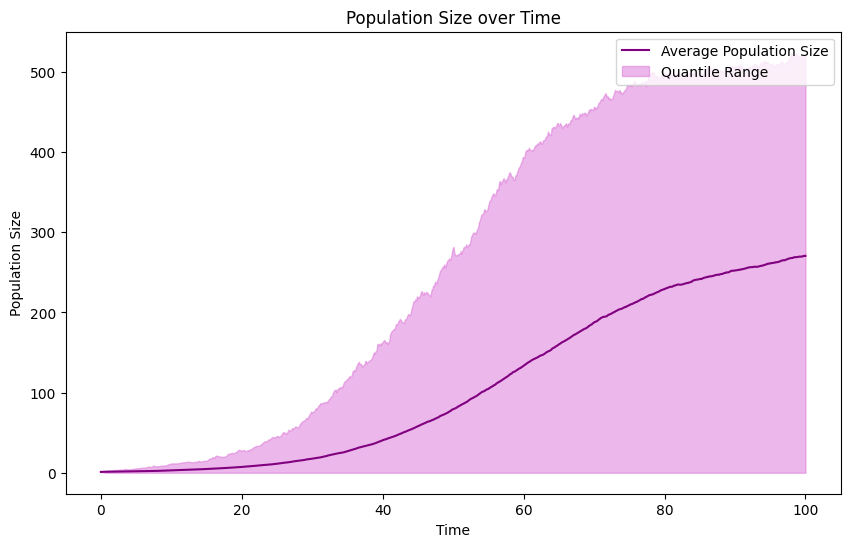

Extinction Probability: 0.43


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def set_parameters(initial_population=50, birth_rate=0.1, death_rate=0.1, competition_coefficient=0.01, carrying_capacity=500, max_time=100):
    return {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'death_rate': death_rate,
        'carrying_capacity': carrying_capacity,
        'max_time': max_time
    }

def run_simulation(params):
    population = params['initial_population']
    birth_rate = params['birth_rate']
    death_rate = params['death_rate']
    max_time = params['max_time']
    carrying_capacity = params['carrying_capacity']
    
    time_points = [0]
    population_sizes = [population]
    
    while population > 0 and time_points[-1] < max_time:
        effective_birth_rate = params['birth_rate'] * (1 - population / carrying_capacity) + params['death_rate']*(population/carrying_capacity)
        next_event_time = np.random.exponential(1 / (death_rate*population + effective_birth_rate*population))
        
        
        # if birth_event_time < death_event_time:
        if np.random.rand() < effective_birth_rate / (effective_birth_rate + death_rate):
            population += 1
        else:
            population -= 1
        
        time_points.append(time_points[-1] + next_event_time)
        population_sizes.append(population)
    
    return time_points, population_sizes

def run_multiple_simulations_with_quantiles(params, num_simulations=100):
    all_time_points = []
    all_population_sizes = []
    extinction_count = 0
    max_time = params['max_time']
    
    for _ in range(num_simulations):
        time_points, population_sizes = run_simulation(params)
        all_time_points.append(time_points)
        all_population_sizes.append(population_sizes)
        if population_sizes[-1] == 0:
            extinction_count += 1
    
    # Calculate quantiles
    max_len = max(len(sim) for sim in all_population_sizes)
    num_points = 1000  # Number of points for interpolation
    average_time_points = np.linspace(0, max_time, num_points)
    interpolated_populations = np.zeros((num_simulations, num_points))
    for i in range(num_simulations):
        interpolated_populations[i] = np.interp(average_time_points, all_time_points[i], all_population_sizes[i])
    average_population_sizes = np.mean(interpolated_populations, axis=0)
    lower_quantile = np.nanquantile(interpolated_populations, 0.05, axis=0)
    upper_quantile = np.nanquantile(interpolated_populations, 0.95, axis=0)
    
    extinction_probability = extinction_count / num_simulations
    
    return average_time_points, interpolated_populations, average_population_sizes, lower_quantile, upper_quantile, extinction_probability


def plot_multiple_simulations_with_quantiles(average_time_points, interpolated_populations, average_population_sizes, lower_quantile, upper_quantile):
    plt.figure(figsize=(10, 6))

    plt.plot(average_time_points, average_population_sizes, color='purple', linestyle='-', label='Average Population Size')
    plt.fill_between(average_time_points, lower_quantile, upper_quantile, color='orchid', alpha=0.5, label='Quantile Range')
    
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title('Population Size over Time')
    plt.legend()
    plt.show()

# Example usage
params = set_parameters(initial_population=1, birth_rate=0.2, death_rate=0.1)

# Multiple simulations\
num_simulations = 100
all_time_points, all_population_sizes, average_population_sizes, lower_quantile, upper_quantile, extinction_probability = run_multiple_simulations_with_quantiles(params, num_simulations)

# Plot results
plot_multiple_simulations_with_quantiles(all_time_points, all_population_sizes, average_population_sizes, lower_quantile, upper_quantile)

# Print extinction probability
print(f"Extinction Probability: {extinction_probability:.2f}")

2 - Deterministic logistic growth

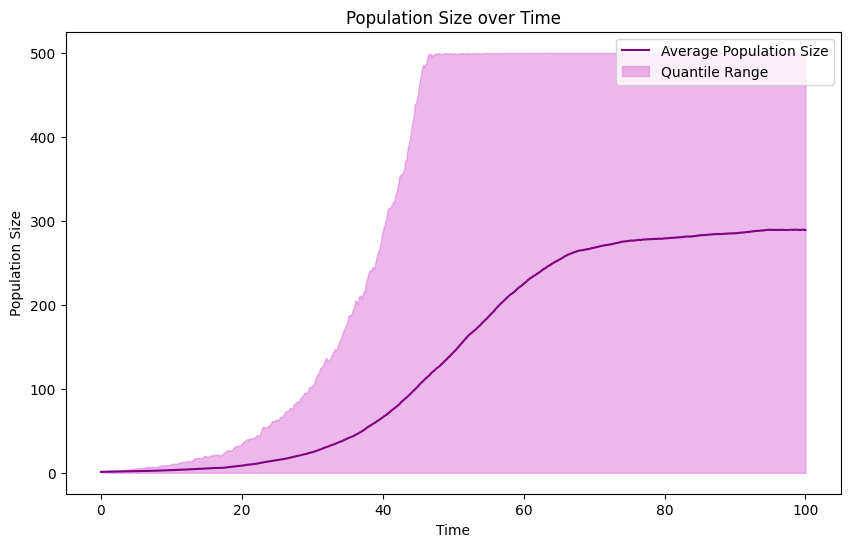

Extinction Probability: 0.42


In [2]:

import numpy as np
import matplotlib.pyplot as plt

def set_parameters(initial_population=50, birth_rate=0.1, death_rate=0.1, carrying_capacity=500, max_time=100):
    return {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'death_rate': death_rate,
        'carrying_capacity': carrying_capacity,
        'max_time': max_time
    }

def run_simulation(params):
    population = params['initial_population']
    birth_rate = params['birth_rate']
    death_rate = params['death_rate']
    carrying_capacity = params['carrying_capacity']
    max_time = params['max_time']
    
    time_points = [0]
    population_sizes = [population]
    
    while population > 0 and time_points[-1] < max_time:
        next_event_time = np.random.exponential(1 / (death_rate * population + birth_rate * population))
        
        if np.random.rand() < birth_rate / (birth_rate + death_rate) and population < carrying_capacity:
            population += 1
        else:
            population -= 1
        
        time_points.append(time_points[-1] + next_event_time)
        population_sizes.append(population)
    
    return time_points, population_sizes

def run_multiple_simulations_with_quantiles(params, num_simulations=100):
    all_time_points = []
    all_population_sizes = []
    extinction_count = 0
    max_time = params['max_time']
    
    for _ in range(num_simulations):
        time_points, population_sizes = run_simulation(params)
        all_time_points.append(time_points)
        all_population_sizes.append(population_sizes)
        if population_sizes[-1] == 0:
            extinction_count += 1

    # Interpolating population sizes
    num_points = 1000
    average_time_points = np.linspace(0, max_time, num_points)
    interpolated_populations = np.zeros((num_simulations, num_points))
    
    for i in range(num_simulations):
        interpolated_populations[i] = np.interp(average_time_points, all_time_points[i], all_population_sizes[i])
    
    average_population_sizes = np.mean(interpolated_populations, axis=0)
    lower_quantile = np.quantile(interpolated_populations, 0.05, axis=0)
    upper_quantile = np.quantile(interpolated_populations, 0.95, axis=0)
    
    extinction_probability = extinction_count / num_simulations
    
    return average_time_points, average_population_sizes, lower_quantile, upper_quantile, extinction_probability

def plot_multiple_simulations_with_quantiles(average_time_points, average_population_sizes, lower_quantile, upper_quantile):
    plt.figure(figsize=(10, 6))
    plt.plot(average_time_points, average_population_sizes, color='purple', linestyle='-', label='Average Population Size')
    plt.fill_between(average_time_points, lower_quantile, upper_quantile, color='orchid', alpha=0.5, label='Quantile Range')
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title('Population Size over Time')
    plt.legend()
    plt.show()

# Example usage
params = set_parameters(initial_population=1, birth_rate=0.2, death_rate=0.1, carrying_capacity=500)
num_simulations = 100
average_time_points, average_population_sizes, lower_quantile, upper_quantile, extinction_probability = run_multiple_simulations_with_quantiles(params, num_simulations)

plot_multiple_simulations_with_quantiles(average_time_points, average_population_sizes, lower_quantile, upper_quantile)

print(f"Extinction Probability: {extinction_probability:.2f}")

3 - Comparison of logistic models - stochastic vs deterministic

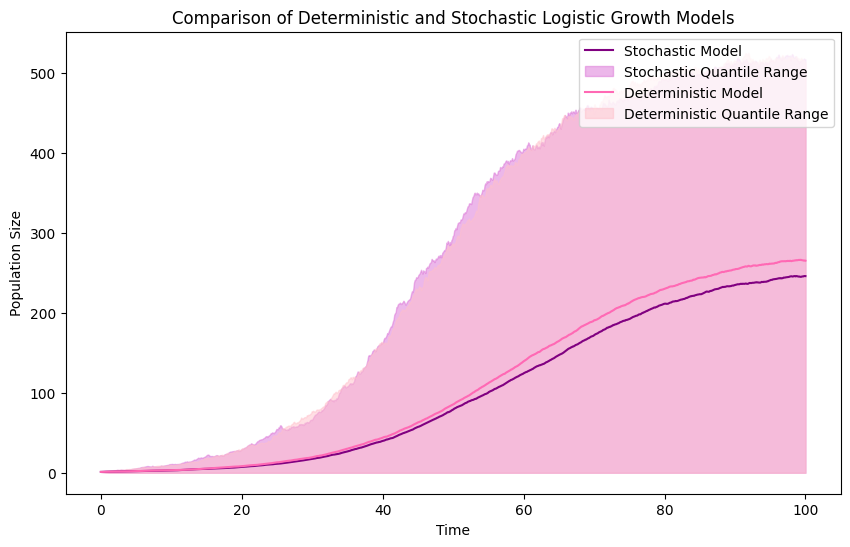

Stochastic Model Extinction Probability: 0.48
Deterministic Model Extinction Probability: 0.45


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def set_parameters(initial_population=50, birth_rate=0.1, death_rate=0.1, carrying_capacity=500, max_time=100):
    return {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'death_rate': death_rate,
        'carrying_capacity': carrying_capacity,
        'max_time': max_time
    }

def run_simulation(params):
    population = params['initial_population']
    birth_rate = params['birth_rate']
    death_rate = params['death_rate']
    max_time = params['max_time']
    carrying_capacity = params['carrying_capacity']
    
    time_points = [0]
    population_sizes = [population]
    
    while population > 0 and time_points[-1] < max_time:
        effective_birth_rate = params['birth_rate'] * (1 - population / carrying_capacity) + params['death_rate'] * (population / carrying_capacity)
        next_event_time = np.random.exponential(1 / (death_rate * population + effective_birth_rate * population))
        
        if np.random.rand() < effective_birth_rate / (effective_birth_rate + death_rate):
            population += 1
        else:
            population -= 1
        
        time_points.append(time_points[-1] + next_event_time)
        population_sizes.append(population)
    
    return time_points, population_sizes

def run_multiple_simulations_with_quantiles(params, num_simulations=100):
    all_time_points = []
    all_population_sizes = []
    extinction_count = 0
    max_time = params['max_time']
    
    for _ in range(num_simulations):
        time_points, population_sizes = run_simulation(params)
        all_time_points.append(time_points)
        all_population_sizes.append(population_sizes)
        if population_sizes[-1] == 0:
            extinction_count += 1
    
    num_points = 1000
    average_time_points = np.linspace(0, max_time, num_points)
    interpolated_populations = np.zeros((num_simulations, num_points))
    
    for i in range(num_simulations):
        interpolated_populations[i] = np.interp(average_time_points, all_time_points[i], all_population_sizes[i])
    
    average_population_sizes = np.mean(interpolated_populations, axis=0)
    lower_quantile = np.quantile(interpolated_populations, 0.05, axis=0)
    upper_quantile = np.quantile(interpolated_populations, 0.95, axis=0)
    
    extinction_probability = extinction_count / num_simulations
    
    return average_time_points, average_population_sizes, lower_quantile, upper_quantile, extinction_probability

def plot_multiple_models_with_quantiles(data1, data2):
    plt.figure(figsize=(10, 6))
    
    # Plot the first dataset
    average_time_points1, average_population_sizes1, lower_quantile1, upper_quantile1, _ = data1
    plt.plot(average_time_points1, average_population_sizes1, color='purple', linestyle='-', label='Stochastic Model')
    plt.fill_between(average_time_points1, lower_quantile1, upper_quantile1, color='orchid', alpha=0.5, label='Stochastic Quantile Range')
    
    # Plot the second dataset
    average_time_points2, average_population_sizes2, lower_quantile2, upper_quantile2, _ = data2
    plt.plot(average_time_points2, average_population_sizes2, color='hotpink', linestyle='-', label='Deterministic Model')
    plt.fill_between(average_time_points2, lower_quantile2, upper_quantile2, color='pink', alpha=0.5, label='Deterministic Quantile Range')
    
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title('Comparison of Deterministic and Stochastic Logistic Growth Models')
    plt.legend()
    plt.show()

# Example usage for two different models
params1 = set_parameters(initial_population=1, birth_rate=0.2, death_rate=0.1, carrying_capacity=500)
params2 = set_parameters(initial_population=1, birth_rate=0.2, death_rate=0.1, carrying_capacity=500)

num_simulations = 100
data1 = run_multiple_simulations_with_quantiles(params1, num_simulations)
data2 = run_multiple_simulations_with_quantiles(params2, num_simulations)

extinction_prob1 = data1[4]
extinction_prob2 = data2[4]

plot_multiple_models_with_quantiles(data1, data2)

print(f"Stochastic Model Extinction Probability: {extinction_prob1:.2f}")
print(f"Deterministic Model Extinction Probability: {extinction_prob2:.2f}")


4 - Survival conditioned stochastic logistic model

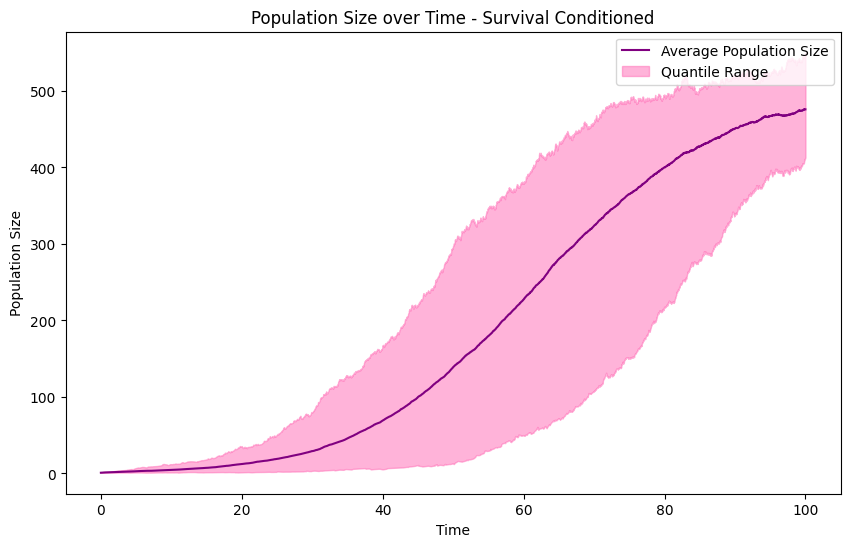

Extinction Probability: 0.36


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def set_parameters(initial_population=50, birth_rate=0.1, death_rate=0.1, carrying_capacity=500, max_time=100):
    return {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'death_rate': death_rate,
        'carrying_capacity': carrying_capacity,
        'max_time': max_time
    }

def run_simulation(params):
    population = params['initial_population']
    birth_rate = params['birth_rate']
    death_rate = params['death_rate']
    max_time = params['max_time']
    carrying_capacity = params['carrying_capacity']

    time_points = [0]
    population_sizes = [population]

    while population > 0 and time_points[-1] < max_time:
        effective_birth_rate = birth_rate * (1 - population / carrying_capacity) + death_rate * (population / carrying_capacity)
        next_event_time = np.random.exponential(1 / (death_rate * population + effective_birth_rate * population))
        
        if np.random.rand() < effective_birth_rate / (effective_birth_rate + death_rate):
            population += 1
        else:
            population -= 1

        time_points.append(time_points[-1] + next_event_time)
        population_sizes.append(population)

    return time_points, population_sizes

def run_multiple_simulations_with_quantiles(params, num_simulations=100):
    all_time_points = []
    all_population_sizes = []
    extinction_count = 0
    max_time = params['max_time']

    for _ in range(num_simulations):
        time_points, population_sizes = run_simulation(params)
        all_time_points.append(time_points)
        all_population_sizes.append(population_sizes)
        if population_sizes[-1] == 0:
            extinction_count += 1

    max_len = max(len(sim) for sim in all_time_points)
    num_points = max_len
    average_time_points = np.linspace(0, max_time, num_points)

    non_extinct_populations = [pop for pop in all_population_sizes if pop[-1] > 0]
    non_extinct_times = [time for time, pop in zip(all_time_points, all_population_sizes) if pop[-1] > 0]
    non_extinct_interpolations = np.zeros((len(non_extinct_populations), num_points))

    for i, (time, pop) in enumerate(zip(non_extinct_times, non_extinct_populations)):
        non_extinct_interpolations[i] = np.interp(average_time_points, time, pop)

    average_population_sizes = np.mean(non_extinct_interpolations, axis=0)
    lower_quantile = np.nanquantile(non_extinct_interpolations, 0.05, axis=0)
    upper_quantile = np.nanquantile(non_extinct_interpolations, 0.95, axis=0)

    extinction_probability = extinction_count / num_simulations

    return average_time_points, non_extinct_interpolations, average_population_sizes, lower_quantile, upper_quantile, extinction_probability

def plot_multiple_simulations_with_quantiles(average_time_points, non_extinct_interpolations, average_population_sizes, lower_quantile, upper_quantile):
    plt.figure(figsize=(10, 6))

    
    plt.plot(average_time_points, average_population_sizes, color='purple', linestyle='-', label='Average Population Size')
    plt.fill_between(average_time_points, lower_quantile, upper_quantile, color='hotpink', alpha=0.5, label='Quantile Range')

    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title('Population Size over Time - Survival Conditioned')
    plt.legend()
    plt.show()

# Example usage
params = set_parameters(initial_population=1, birth_rate=0.2, death_rate=0.1)

# Multiple simulations
num_simulations = 100
average_time_points, non_extinct_interpolations, average_population_sizes, lower_quantile, upper_quantile, extinction_probability = run_multiple_simulations_with_quantiles(params, num_simulations)

# Plot results
plot_multiple_simulations_with_quantiles(average_time_points, non_extinct_interpolations, average_population_sizes, lower_quantile, upper_quantile)

# Print extinction probability
print(f"Extinction Probability: {extinction_probability:.2f}")


5 - Survival conditioned deterministic model

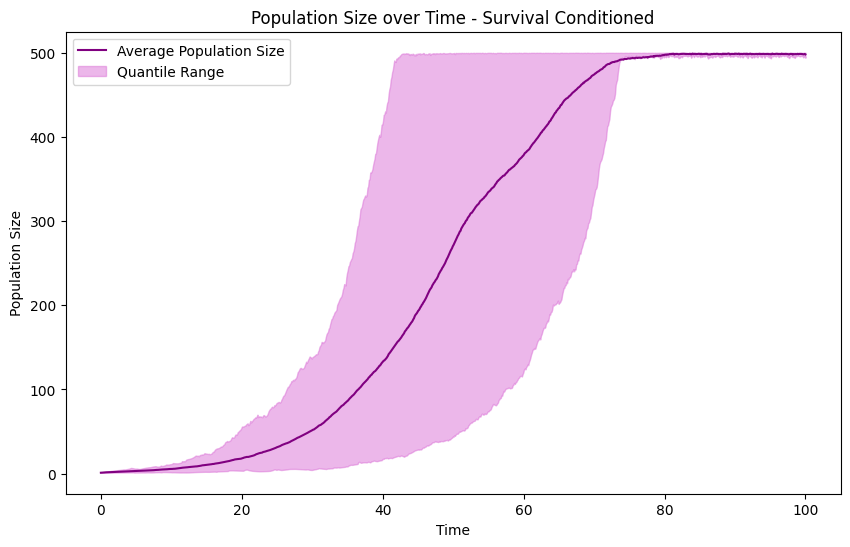

Extinction Probability: 0.55


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def set_parameters(initial_population=50, birth_rate=0.1, death_rate=0.1, carrying_capacity=500, max_time=100):
    return {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'death_rate': death_rate,
        'carrying_capacity': carrying_capacity,
        'max_time': max_time
    }

def run_simulation(params):
    population = params['initial_population']
    birth_rate = params['birth_rate']
    death_rate = params['death_rate']
    carrying_capacity = params['carrying_capacity']
    max_time = params['max_time']

    time_points = [0]
    population_sizes = [population]

    while population > 0 and time_points[-1] < max_time:
        next_event_time = np.random.exponential(1 / (death_rate * population + birth_rate * population))

        if np.random.rand() < birth_rate / (birth_rate + death_rate) and population < carrying_capacity:
            population += 1
        else:
            population -= 1

        time_points.append(time_points[-1] + next_event_time)
        population_sizes.append(population)

    return time_points, population_sizes

def run_multiple_simulations_with_quantiles(params, num_simulations=100):
    all_time_points = []
    all_population_sizes = []
    extinction_count = 0
    max_time = params['max_time']

    for _ in range(num_simulations):
        time_points, population_sizes = run_simulation(params)
        all_time_points.append(time_points)
        all_population_sizes.append(population_sizes)
        if population_sizes[-1] == 0:
            extinction_count += 1

    # Interpolating population sizes for non-extinct populations
    num_points = 1000
    average_time_points = np.linspace(0, max_time, num_points)
    non_extinct_populations = [pop for pop in all_population_sizes if pop[-1] > 0]
    non_extinct_times = [time for time, pop in zip(all_time_points, all_population_sizes) if pop[-1] > 0]
    non_extinct_interpolations = np.zeros((len(non_extinct_populations), num_points))

    for i, (time, pop) in enumerate(zip(non_extinct_times, non_extinct_populations)):
        non_extinct_interpolations[i] = np.interp(average_time_points, time, pop)

    average_population_sizes = np.mean(non_extinct_interpolations, axis=0)
    lower_quantile = np.quantile(non_extinct_interpolations, 0.05, axis=0)
    upper_quantile = np.quantile(non_extinct_interpolations, 0.95, axis=0)

    extinction_probability = extinction_count / num_simulations

    return average_time_points, non_extinct_interpolations, average_population_sizes, lower_quantile, upper_quantile, extinction_probability

def plot_multiple_simulations_with_quantiles(average_time_points, non_extinct_interpolations, average_population_sizes, lower_quantile, upper_quantile):
    plt.figure(figsize=(10, 6))

       
    plt.plot(average_time_points, average_population_sizes, color='purple', linestyle='-', label='Average Population Size')
    plt.fill_between(average_time_points, lower_quantile, upper_quantile, color='orchid', alpha=0.5, label='Quantile Range')
    
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title('Population Size over Time - Survival Conditioned')
    plt.legend()
    plt.show()

# Example usage
params = set_parameters(initial_population=1, birth_rate=0.2, death_rate=0.1, carrying_capacity=500)
num_simulations = 100
average_time_points, non_extinct_interpolations, average_population_sizes, lower_quantile, upper_quantile, extinction_probability = run_multiple_simulations_with_quantiles(params, num_simulations)

plot_multiple_simulations_with_quantiles(average_time_points, non_extinct_interpolations, average_population_sizes, lower_quantile, upper_quantile)

print(f"Extinction Probability: {extinction_probability:.2f}")


6 - Comparison stochastic vs deterministic (survival conditioned)

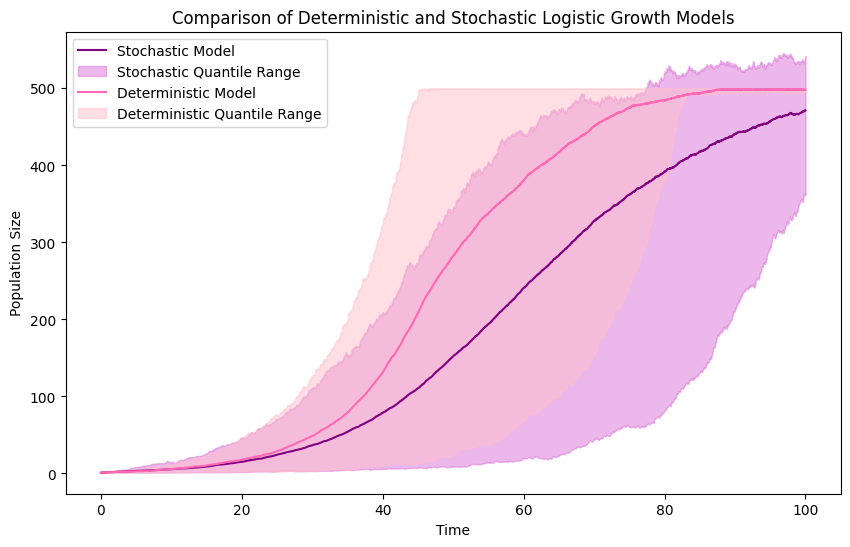

Extinction Probability (Stochastic): 0.44
Extinction Probability (Deterministic): 0.44


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def set_parameters(initial_population=50, birth_rate=0.1, death_rate=0.1, carrying_capacity=500, max_time=100):
    return {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'death_rate': death_rate,
        'carrying_capacity': carrying_capacity,
        'max_time': max_time
    }

def run_stochastic_simulation(params):
    population = params['initial_population']
    birth_rate = params['birth_rate']
    death_rate = params['death_rate']
    max_time = params['max_time']
    carrying_capacity = params['carrying_capacity']

    time_points = [0]
    population_sizes = [population]

    while population > 0 and time_points[-1] < max_time:
        effective_birth_rate = birth_rate * (1 - population / carrying_capacity) + death_rate * (population / carrying_capacity)
        next_event_time = np.random.exponential(1 / (death_rate * population + effective_birth_rate * population))
        
        if np.random.rand() < effective_birth_rate / (effective_birth_rate + death_rate):
            population += 1
        else:
            population -= 1

        time_points.append(time_points[-1] + next_event_time)
        population_sizes.append(population)

    return time_points, population_sizes

def run_deterministic_simulation(params):
    population = params['initial_population']
    birth_rate = params['birth_rate']
    death_rate = params['death_rate']
    carrying_capacity = params['carrying_capacity']
    max_time = params['max_time']

    time_points = [0]
    population_sizes = [population]

    while population > 0 and time_points[-1] < max_time:
        next_event_time = np.random.exponential(1 / (death_rate * population + birth_rate * population))

        if np.random.rand() < birth_rate / (birth_rate + death_rate) and population < carrying_capacity:
            population += 1
        else:
            population -= 1

        time_points.append(time_points[-1] + next_event_time)
        population_sizes.append(population)

    return time_points, population_sizes

def run_multiple_simulations_with_quantiles(params, num_simulations=100, model='stochastic'):
    all_time_points = []
    all_population_sizes = []
    extinction_count = 0
    max_time = params['max_time']

    for _ in range(num_simulations):
        if model == 'stochastic':
            time_points, population_sizes = run_stochastic_simulation(params)
        else:
            time_points, population_sizes = run_deterministic_simulation(params)
        all_time_points.append(time_points)
        all_population_sizes.append(population_sizes)
        if population_sizes[-1] == 0:
            extinction_count += 1

    max_len = max(len(sim) for sim in all_time_points)
    num_points = max_len
    average_time_points = np.linspace(0, max_time, num_points)

    non_extinct_populations = [pop for pop in all_population_sizes if pop[-1] > 0]
    non_extinct_times = [time for time, pop in zip(all_time_points, all_population_sizes) if pop[-1] > 0]
    non_extinct_interpolations = np.zeros((len(non_extinct_populations), num_points))

    for i, (time, pop) in enumerate(zip(non_extinct_times, non_extinct_populations)):
        non_extinct_interpolations[i] = np.interp(average_time_points, time, pop)

    average_population_sizes = np.mean(non_extinct_interpolations, axis=0)
    lower_quantile = np.nanquantile(non_extinct_interpolations, 0.05, axis=0)
    upper_quantile = np.nanquantile(non_extinct_interpolations, 0.95, axis=0)

    extinction_probability = extinction_count / num_simulations

    return average_time_points, non_extinct_interpolations, average_population_sizes, lower_quantile, upper_quantile, extinction_probability

def plot_multiple_simulations_with_quantiles(average_time_points_stochastic, average_population_sizes_stochastic, lower_quantile_stochastic, upper_quantile_stochastic,
                                             average_time_points_deterministic, average_population_sizes_deterministic, lower_quantile_deterministic, upper_quantile_deterministic):
    plt.figure(figsize=(10, 6))

    # Stochastic model
    plt.plot(average_time_points_stochastic, average_population_sizes_stochastic, color='purple', linestyle='-', label='Stochastic Model')
    plt.fill_between(average_time_points_stochastic, lower_quantile_stochastic, upper_quantile_stochastic, color='orchid', alpha=0.5, label='Stochastic Quantile Range')

    # Deterministic model
    plt.plot(average_time_points_deterministic, average_population_sizes_deterministic, color='hotpink', linestyle='-', label='Deterministic Model')
    plt.fill_between(average_time_points_deterministic, lower_quantile_deterministic, upper_quantile_deterministic, color='pink', alpha=0.5, label='Deterministic Quantile Range')

    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title('Comparison of Deterministic and Stochastic Logistic Growth Models')
    plt.legend()
    plt.show()

# Example usage
params = set_parameters(initial_population=1, birth_rate=0.2, death_rate=0.1)

# Multiple simulations for stochastic model
num_simulations = 100
average_time_points_stochastic, non_extinct_interpolations_stochastic, average_population_sizes_stochastic, lower_quantile_stochastic, upper_quantile_stochastic, extinction_probability_stochastic = run_multiple_simulations_with_quantiles(params, num_simulations, model='stochastic')

# Multiple simulations for deterministic model
average_time_points_deterministic, non_extinct_interpolations_deterministic, average_population_sizes_deterministic, lower_quantile_deterministic, upper_quantile_deterministic, extinction_probability_deterministic = run_multiple_simulations_with_quantiles(params, num_simulations, model='deterministic')

# Plot results
plot_multiple_simulations_with_quantiles(average_time_points_stochastic, average_population_sizes_stochastic, lower_quantile_stochastic, upper_quantile_stochastic,
                                         average_time_points_deterministic, average_population_sizes_deterministic, lower_quantile_deterministic, upper_quantile_deterministic)

# Print extinction probabilities
print(f"Extinction Probability (Stochastic): {extinction_probability_stochastic:.2f}")
print(f"Extinction Probability (Deterministic): {extinction_probability_deterministic:.2f}")
